In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [3]:
t = 500.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
const α = 1.15; const U0 = 0.3;
const xthr = 0.9; const ythr = 0.4
const ΔU0 = 0.4
I0 = -1.50930;

In [5]:
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]

ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.528766, 0.961119, 0.418381]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, …, 0.3, 0.4, 0.4375, -1.5093]

In [23]:
I0range = range( -1.509460, -1.509490, length = 5001 )

idx_control_parameter = 11

idx_fix = 2; fixed_value = 0.915
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-13, atol = 1e-13);

In [24]:
I0range

-1.50946:-6.0e-9:-1.50949

In [8]:
idx_save = 1
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.5093
parameter = -1.5093000380076016
parameter = -1.509300076015203
parameter = -1.5093001140228046
parameter = -1.5093001520304061
parameter = -1.5093001900380076
parameter = -1.5093002280456091
parameter = -1.5093002660532107
parameter = -1.5093003040608122
parameter = -1.5093003420684137
parameter = -1.5093003800760152
parameter = -1.5093004180836167
parameter = -1.5093004560912182
parameter = -1.5093004940988197
parameter = -1.5093005321064212
parameter = -1.5093005701140227
parameter = -1.5093006081216243
parameter = -1.5093006461292258
parameter = -1.5093006841368273
parameter = -1.5093007221444288
parameter = -1.5093007601520303
parameter = -1.509300798159632
parameter = -1.5093008361672335
parameter = -1.509300874174835
parameter = -1.5093009121824366
parameter = -1.509300950190038
parameter = -1.5093009881976396
parameter = -1.509301026205241
parameter = -1.5093010642128426
parameter = -1.5093011022204441
parameter = -1.5093011402280456
parameter = -1.5093011782

parameter = -1.5093098059611922
parameter = -1.5093098439687938
parameter = -1.5093098819763953
parameter = -1.5093099199839968
parameter = -1.5093099579915983
parameter = -1.5093099959991998
parameter = -1.5093100340068013
parameter = -1.5093100720144028
parameter = -1.5093101100220043
parameter = -1.5093101480296058
parameter = -1.5093101860372073
parameter = -1.5093102240448089
parameter = -1.5093102620524106
parameter = -1.509310300060012
parameter = -1.5093103380676136
parameter = -1.5093103760752151
parameter = -1.5093104140828166
parameter = -1.5093104520904181
parameter = -1.5093104900980197
parameter = -1.5093105281056212
parameter = -1.5093105661132227
parameter = -1.5093106041208242
parameter = -1.5093106421284257
parameter = -1.5093106801360272
parameter = -1.5093107181436287
parameter = -1.5093107561512302
parameter = -1.5093107941588317
parameter = -1.5093108321664332
parameter = -1.5093108701740348
parameter = -1.5093109081816363
parameter = -1.5093109461892378
parameter

parameter = -1.5093196119223844
parameter = -1.509319649929986
parameter = -1.5093196879375874
parameter = -1.509319725945189
parameter = -1.5093197639527907
parameter = -1.5093198019603922
parameter = -1.5093198399679937
parameter = -1.5093198779755952
parameter = -1.5093199159831967
parameter = -1.5093199539907982
parameter = -1.5093199919983997
parameter = -1.5093200300060012
parameter = -1.5093200680136027
parameter = -1.5093201060212043
parameter = -1.5093201440288058
parameter = -1.5093201820364073
parameter = -1.5093202200440088
parameter = -1.5093202580516103
parameter = -1.5093202960592118
parameter = -1.5093203340668133
parameter = -1.5093203720744148
parameter = -1.5093204100820163
parameter = -1.5093204480896178
parameter = -1.5093204860972194
parameter = -1.5093205241048209
parameter = -1.5093205621124224
parameter = -1.5093206001200241
parameter = -1.5093206381276256
parameter = -1.5093206761352271
parameter = -1.5093207141428286
parameter = -1.5093207521504302
parameter 

parameter = -1.5093294178835768
parameter = -1.5093294558911783
parameter = -1.5093294938987798
parameter = -1.5093295319063813
parameter = -1.5093295699139828
parameter = -1.5093296079215843
parameter = -1.5093296459291858
parameter = -1.5093296839367873
parameter = -1.5093297219443889
parameter = -1.5093297599519904
parameter = -1.5093297979595919
parameter = -1.5093298359671934
parameter = -1.509329873974795
parameter = -1.5093299119823964
parameter = -1.509329949989998
parameter = -1.5093299879975994
parameter = -1.509330026005201
parameter = -1.5093300640128025
parameter = -1.5093301020204042
parameter = -1.5093301400280057
parameter = -1.5093301780356072
parameter = -1.5093302160432087
parameter = -1.5093302540508102
parameter = -1.5093302920584117
parameter = -1.5093303300660132
parameter = -1.5093303680736148
parameter = -1.5093304060812163
parameter = -1.5093304440888178
parameter = -1.5093304820964193
parameter = -1.5093305201040208
parameter = -1.5093305581116223
parameter =

parameter = -1.5093391858371674
parameter = -1.509339223844769
parameter = -1.5093392618523704
parameter = -1.509339299859972
parameter = -1.5093393378675735
parameter = -1.509339375875175
parameter = -1.5093394138827765
parameter = -1.509339451890378
parameter = -1.5093394898979795
parameter = -1.509339527905581
parameter = -1.5093395659131827
parameter = -1.5093396039207843
parameter = -1.5093396419283858
parameter = -1.5093396799359873
parameter = -1.5093397179435888
parameter = -1.5093397559511903
parameter = -1.5093397939587918
parameter = -1.5093398319663933
parameter = -1.5093398699739948
parameter = -1.5093399079815963
parameter = -1.5093399459891979
parameter = -1.5093399839967994
parameter = -1.5093400220044009
parameter = -1.5093400600120024
parameter = -1.509340098019604
parameter = -1.5093401360272054
parameter = -1.509340174034807
parameter = -1.5093402120424084
parameter = -1.50934025005001
parameter = -1.5093402880576114
parameter = -1.509340326065213
parameter = -1.509

parameter = -1.5093489917983596
parameter = -1.509349029805961
parameter = -1.5093490678135628
parameter = -1.5093491058211643
parameter = -1.5093491438287658
parameter = -1.5093491818363673
parameter = -1.5093492198439689
parameter = -1.5093492578515704
parameter = -1.5093492958591719
parameter = -1.5093493338667734
parameter = -1.509349371874375
parameter = -1.5093494098819764
parameter = -1.509349447889578
parameter = -1.5093494858971794
parameter = -1.509349523904781
parameter = -1.5093495619123825
parameter = -1.509349599919984
parameter = -1.5093496379275855
parameter = -1.509349675935187
parameter = -1.5093497139427885
parameter = -1.50934975195039
parameter = -1.5093497899579915
parameter = -1.509349827965593
parameter = -1.5093498659731945
parameter = -1.509349903980796
parameter = -1.5093499419883978
parameter = -1.5093499799959993
parameter = -1.5093500180036008
parameter = -1.5093500560112023
parameter = -1.5093500940188038
parameter = -1.5093501320264053
parameter = -1.509

parameter = -1.509358797759552
parameter = -1.5093588357671535
parameter = -1.509358873774755
parameter = -1.5093589117823565
parameter = -1.509358949789958
parameter = -1.5093589877975595
parameter = -1.509359025805161
parameter = -1.5093590638127625
parameter = -1.509359101820364
parameter = -1.5093591398279655
parameter = -1.509359177835567
parameter = -1.5093592158431686
parameter = -1.50935925385077
parameter = -1.5093592918583716
parameter = -1.509359329865973
parameter = -1.5093593678735746
parameter = -1.5093594058811763
parameter = -1.5093594438887779
parameter = -1.5093594818963794
parameter = -1.5093595199039809
parameter = -1.5093595579115824
parameter = -1.509359595919184
parameter = -1.5093596339267854
parameter = -1.509359671934387
parameter = -1.5093597099419884
parameter = -1.50935974794959
parameter = -1.5093597859571914
parameter = -1.509359823964793
parameter = -1.5093598619723945
parameter = -1.509359899979996
parameter = -1.5093599379875975
parameter = -1.50935997

parameter = -1.509368603720744
parameter = -1.5093686417283456
parameter = -1.5093686797359471
parameter = -1.5093687177435486
parameter = -1.5093687557511501
parameter = -1.5093687937587517
parameter = -1.5093688317663532
parameter = -1.5093688697739547
parameter = -1.5093689077815564
parameter = -1.509368945789158
parameter = -1.5093689837967594
parameter = -1.509369021804361
parameter = -1.5093690598119625
parameter = -1.509369097819564
parameter = -1.5093691358271655
parameter = -1.509369173834767
parameter = -1.5093692118423685
parameter = -1.50936924984997
parameter = -1.5093692878575715
parameter = -1.509369325865173
parameter = -1.5093693638727745
parameter = -1.509369401880376
parameter = -1.5093694398879776
parameter = -1.509369477895579
parameter = -1.5093695159031806
parameter = -1.509369553910782
parameter = -1.5093695919183836
parameter = -1.5093696299259851
parameter = -1.5093696679335866
parameter = -1.5093697059411881
parameter = -1.5093697439487899
parameter = -1.5093

parameter = -1.5093784096819365
parameter = -1.509378447689538
parameter = -1.5093784856971395
parameter = -1.509378523704741
parameter = -1.5093785617123425
parameter = -1.509378599719944
parameter = -1.5093786377275455
parameter = -1.509378675735147
parameter = -1.5093787137427486
parameter = -1.50937875175035
parameter = -1.5093787897579516
parameter = -1.509378827765553
parameter = -1.5093788657731546
parameter = -1.5093789037807561
parameter = -1.5093789417883576
parameter = -1.5093789797959591
parameter = -1.5093790178035607
parameter = -1.5093790558111622
parameter = -1.5093790938187637
parameter = -1.5093791318263652
parameter = -1.5093791698339667
parameter = -1.5093792078415682
parameter = -1.50937924584917
parameter = -1.5093792838567714
parameter = -1.509379321864373
parameter = -1.5093793598719745
parameter = -1.509379397879576
parameter = -1.5093794358871775
parameter = -1.509379473894779
parameter = -1.5093795119023805
parameter = -1.509379549909982
parameter = -1.509379

parameter = -1.5093882536507301
parameter = -1.5093882916583317
parameter = -1.5093883296659332
parameter = -1.5093883676735347
parameter = -1.5093884056811362
parameter = -1.5093884436887377
parameter = -1.5093884816963392
parameter = -1.5093885197039407
parameter = -1.5093885577115422
parameter = -1.5093885957191437
parameter = -1.5093886337267453
parameter = -1.5093886717343468
parameter = -1.5093887097419485
parameter = -1.50938874774955
parameter = -1.5093887857571515
parameter = -1.509388823764753
parameter = -1.5093888617723545
parameter = -1.509388899779956
parameter = -1.5093889377875576
parameter = -1.509388975795159
parameter = -1.5093890138027606
parameter = -1.509389051810362
parameter = -1.5093890898179636
parameter = -1.5093891278255651
parameter = -1.5093891658331666
parameter = -1.5093892038407681
parameter = -1.5093892418483696
parameter = -1.5093892798559712
parameter = -1.5093893178635727
parameter = -1.5093893558711742
parameter = -1.5093893938787757
parameter = -1

parameter = -1.5093980976195238
parameter = -1.5093981356271253
parameter = -1.5093981736347268
parameter = -1.5093982116423286
parameter = -1.50939824964993
parameter = -1.5093982876575316
parameter = -1.509398325665133
parameter = -1.5093983636727346
parameter = -1.5093984016803361
parameter = -1.5093984396879376
parameter = -1.5093984776955391
parameter = -1.5093985157031407
parameter = -1.5093985537107422
parameter = -1.5093985917183437
parameter = -1.5093986297259452
parameter = -1.5093986677335467
parameter = -1.5093987057411482
parameter = -1.5093987437487497
parameter = -1.5093987817563512
parameter = -1.5093988197639527
parameter = -1.5093988577715542
parameter = -1.5093988957791558
parameter = -1.5093989337867573
parameter = -1.5093989717943588
parameter = -1.5093990098019603
parameter = -1.509399047809562
parameter = -1.5093990858171635
parameter = -1.509399123824765
parameter = -1.5093991618323666
parameter = -1.509399199839968
parameter = -1.5093992378475696
parameter = -1

parameter = -1.5094079415883177
parameter = -1.5094079795959192
parameter = -1.5094080176035207
parameter = -1.5094080556111222
parameter = -1.5094080936187237
parameter = -1.5094081316263253
parameter = -1.5094081696339268
parameter = -1.5094082076415283
parameter = -1.5094082456491298
parameter = -1.5094082836567313
parameter = -1.5094083216643328
parameter = -1.5094083596719343
parameter = -1.5094083976795358
parameter = -1.5094084356871373
parameter = -1.5094084736947389
parameter = -1.5094085117023404
parameter = -1.509408549709942
parameter = -1.5094085877175436
parameter = -1.5094086257251451
parameter = -1.5094086637327466
parameter = -1.5094087017403481
parameter = -1.5094087397479496
parameter = -1.5094087777555512
parameter = -1.5094088157631527
parameter = -1.5094088537707542
parameter = -1.5094088917783557
parameter = -1.5094089297859572
parameter = -1.5094089677935587
parameter = -1.5094090058011602
parameter = -1.5094090438087617
parameter = -1.5094090818163632
parameter

parameter = -1.5094177855571114
parameter = -1.5094178235647129
parameter = -1.5094178615723144
parameter = -1.509417899579916
parameter = -1.5094179375875174
parameter = -1.509417975595119
parameter = -1.5094180136027207
parameter = -1.5094180516103222
parameter = -1.5094180896179237
parameter = -1.5094181276255252
parameter = -1.5094181656331267
parameter = -1.5094182036407282
parameter = -1.5094182416483297
parameter = -1.5094182796559312
parameter = -1.5094183176635327
parameter = -1.5094183556711342
parameter = -1.5094183936787358
parameter = -1.5094184316863373
parameter = -1.5094184696939388
parameter = -1.5094185077015403
parameter = -1.5094185457091418
parameter = -1.5094185837167433
parameter = -1.5094186217243448
parameter = -1.5094186597319463
parameter = -1.5094186977395478
parameter = -1.5094187357471494
parameter = -1.5094187737547509
parameter = -1.5094188117623524
parameter = -1.5094188497699539
parameter = -1.5094188877775556
parameter = -1.5094189257851571
parameter 

parameter = -1.5094276295259053
parameter = -1.5094276675335068
parameter = -1.5094277055411083
parameter = -1.5094277435487098
parameter = -1.5094277815563113
parameter = -1.5094278195639128
parameter = -1.5094278575715143
parameter = -1.5094278955791158
parameter = -1.5094279335867173
parameter = -1.5094279715943189
parameter = -1.5094280096019204
parameter = -1.5094280476095219
parameter = -1.5094280856171234
parameter = -1.509428123624725
parameter = -1.5094281616323264
parameter = -1.509428199639928
parameter = -1.5094282376475294
parameter = -1.509428275655131
parameter = -1.5094283136627324
parameter = -1.509428351670334
parameter = -1.5094283896779357
parameter = -1.5094284276855372
parameter = -1.5094284656931387
parameter = -1.5094285037007402
parameter = -1.5094285417083417
parameter = -1.5094285797159432
parameter = -1.5094286177235448
parameter = -1.5094286557311463
parameter = -1.5094286937387478
parameter = -1.5094287317463493
parameter = -1.5094287697539508
parameter = 

parameter = -1.509437397479496
parameter = -1.5094374354870974
parameter = -1.509437473494699
parameter = -1.5094375115023004
parameter = -1.509437549509902
parameter = -1.5094375875175035
parameter = -1.509437625525105
parameter = -1.5094376635327065
parameter = -1.509437701540308
parameter = -1.5094377395479095
parameter = -1.509437777555511
parameter = -1.5094378155631125
parameter = -1.5094378535707142
parameter = -1.5094378915783158
parameter = -1.5094379295859173
parameter = -1.5094379675935188
parameter = -1.5094380056011203
parameter = -1.5094380436087218
parameter = -1.5094380816163233
parameter = -1.5094381196239248
parameter = -1.5094381576315263
parameter = -1.5094381956391278
parameter = -1.5094382336467294
parameter = -1.5094382716543309
parameter = -1.5094383096619324
parameter = -1.5094383476695339
parameter = -1.5094383856771354
parameter = -1.509438423684737
parameter = -1.5094384616923384
parameter = -1.50943849969994
parameter = -1.5094385377075414
parameter = -1.50

parameter = -1.5094471654330865
parameter = -1.509447203440688
parameter = -1.5094472414482896
parameter = -1.509447279455891
parameter = -1.5094473174634926
parameter = -1.5094473554710943
parameter = -1.5094473934786958
parameter = -1.5094474314862973
parameter = -1.5094474694938989
parameter = -1.5094475075015004
parameter = -1.5094475455091019
parameter = -1.5094475835167034
parameter = -1.509447621524305
parameter = -1.5094476595319064
parameter = -1.509447697539508
parameter = -1.5094477355471094
parameter = -1.509447773554711
parameter = -1.5094478115623124
parameter = -1.509447849569914
parameter = -1.5094478875775155
parameter = -1.509447925585117
parameter = -1.5094479635927185
parameter = -1.50944800160032
parameter = -1.5094480396079215
parameter = -1.509448077615523
parameter = -1.5094481156231245
parameter = -1.509448153630726
parameter = -1.5094481916383278
parameter = -1.5094482296459293
parameter = -1.5094482676535308
parameter = -1.5094483056611323
parameter = -1.5094

parameter = -1.509456971394279
parameter = -1.5094570094018804
parameter = -1.509457047409482
parameter = -1.5094570854170835
parameter = -1.509457123424685
parameter = -1.5094571614322865
parameter = -1.509457199439888
parameter = -1.5094572374474895
parameter = -1.509457275455091
parameter = -1.5094573134626925
parameter = -1.509457351470294
parameter = -1.5094573894778955
parameter = -1.509457427485497
parameter = -1.5094574654930986
parameter = -1.5094575035007
parameter = -1.5094575415083016
parameter = -1.509457579515903
parameter = -1.5094576175235046
parameter = -1.5094576555311061
parameter = -1.5094576935387078
parameter = -1.5094577315463094
parameter = -1.5094577695539109
parameter = -1.5094578075615124
parameter = -1.5094578455691139
parameter = -1.5094578835767154
parameter = -1.509457921584317
parameter = -1.5094579595919184
parameter = -1.50945799759952
parameter = -1.5094580356071214
parameter = -1.509458073614723
parameter = -1.5094581116223245
parameter = -1.50945814

parameter = -1.5094667393478696
parameter = -1.509466777355471
parameter = -1.5094668153630726
parameter = -1.509466853370674
parameter = -1.5094668913782756
parameter = -1.5094669293858771
parameter = -1.5094669673934786
parameter = -1.5094670054010801
parameter = -1.5094670434086817
parameter = -1.5094670814162832
parameter = -1.5094671194238847
parameter = -1.5094671574314864
parameter = -1.509467195439088
parameter = -1.5094672334466894
parameter = -1.509467271454291
parameter = -1.5094673094618924
parameter = -1.509467347469494
parameter = -1.5094673854770955
parameter = -1.509467423484697
parameter = -1.5094674614922985
parameter = -1.5094674994999
parameter = -1.5094675375075015
parameter = -1.509467575515103
parameter = -1.5094676135227045
parameter = -1.509467651530306
parameter = -1.5094676895379076
parameter = -1.509467727545509
parameter = -1.5094677655531106
parameter = -1.509467803560712
parameter = -1.5094678415683136
parameter = -1.509467879575915
parameter = -1.5094679

parameter = -1.5094765073014602
parameter = -1.5094765453090617
parameter = -1.5094765833166632
parameter = -1.5094766213242647
parameter = -1.5094766593318665
parameter = -1.509476697339468
parameter = -1.5094767353470695
parameter = -1.509476773354671
parameter = -1.5094768113622725
parameter = -1.509476849369874
parameter = -1.5094768873774755
parameter = -1.509476925385077
parameter = -1.5094769633926786
parameter = -1.50947700140028
parameter = -1.5094770394078816
parameter = -1.509477077415483
parameter = -1.5094771154230846
parameter = -1.5094771534306861
parameter = -1.5094771914382876
parameter = -1.5094772294458891
parameter = -1.5094772674534906
parameter = -1.5094773054610922
parameter = -1.5094773434686937
parameter = -1.5094773814762952
parameter = -1.5094774194838967
parameter = -1.5094774574914982
parameter = -1.5094774954991
parameter = -1.5094775335067014
parameter = -1.509477571514303
parameter = -1.5094776095219045
parameter = -1.509477647529506
parameter = -1.50947

parameter = -1.5094863132626526
parameter = -1.509486351270254
parameter = -1.5094863892778556
parameter = -1.5094864272854571
parameter = -1.5094864652930586
parameter = -1.5094865033006601
parameter = -1.5094865413082617
parameter = -1.5094865793158632
parameter = -1.5094866173234647
parameter = -1.5094866553310662
parameter = -1.5094866933386677
parameter = -1.5094867313462692
parameter = -1.5094867693538707
parameter = -1.5094868073614722
parameter = -1.5094868453690737
parameter = -1.5094868833766752
parameter = -1.5094869213842768
parameter = -1.5094869593918783
parameter = -1.50948699739948
parameter = -1.5094870354070815
parameter = -1.509487073414683
parameter = -1.5094871114222845
parameter = -1.509487149429886
parameter = -1.5094871874374876
parameter = -1.509487225445089
parameter = -1.5094872634526906
parameter = -1.509487301460292
parameter = -1.5094873394678936
parameter = -1.509487377475495
parameter = -1.5094874154830966
parameter = -1.5094874534906981
parameter = -1.5

In [9]:
save("E_right_space_5000_dots_change_range.jld", "data", output)

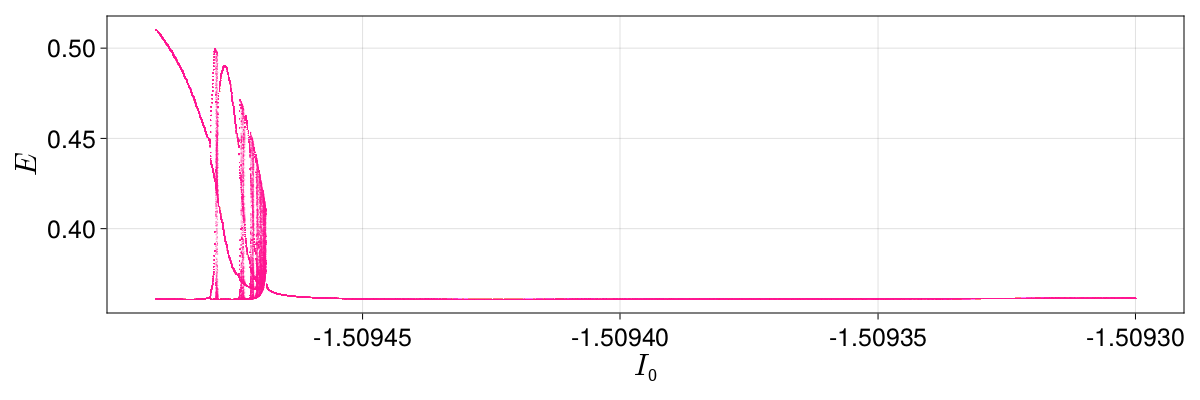

In [13]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("deeppink", 0.5), markersize = 1.0)
end
f

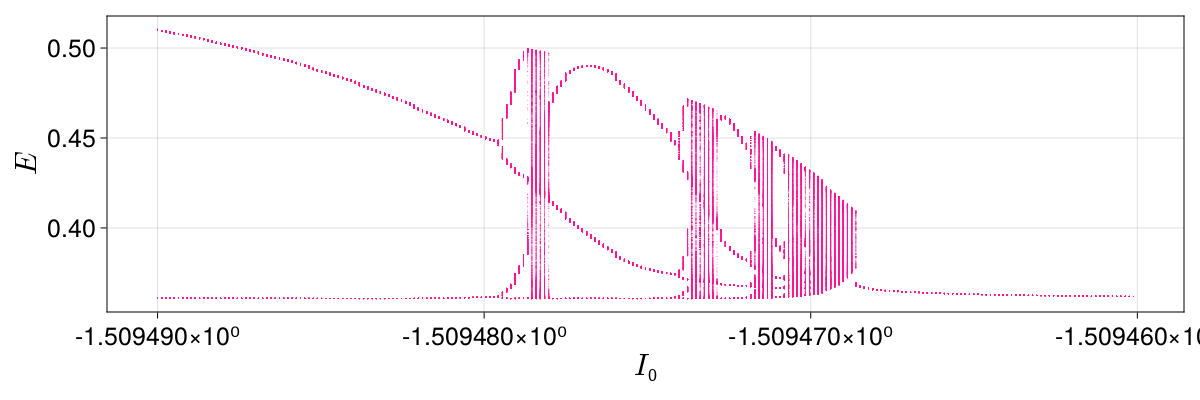

In [54]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("deeppink", 0.5), markersize = 1.0)
end
f

In [53]:
save("E_right_space_5000_dots.jld", "data", output)

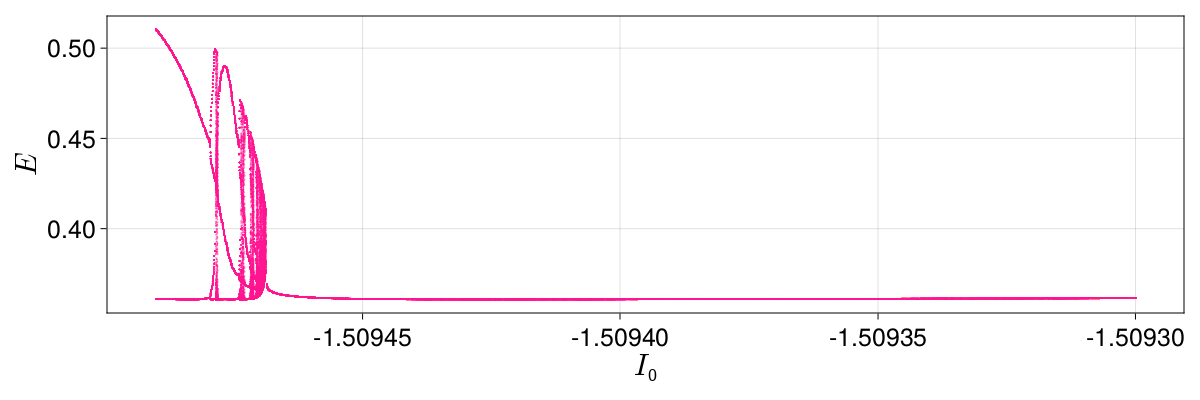

In [18]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("deeppink", 0.5), markersize = 1.5)
end
f